# Data Preprocessing


## Imports

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import librosa
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
from IPython.display import Image 
import plotly.graph_objects as go

In [2]:
sns.set()
plt.style.use('ggplot')
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("expand_frame_repr", False)
pd.set_option('display.float_format', '{:.2f}'.format)
sys.path.append(os.path.abspath(os.path.join('../scripts')))

In [3]:
from clean_audio import CleanAudio
from file_handler import FileHandler
from audio_vis import AudioVis

In [4]:
clean_audio = CleanAudio()
file_handler = FileHandler()
audio_vis = AudioVis()

## Load Data


In [5]:
PATH_TRAIN_WAV = "../data/AMHARIC_CLEAN/train/wav/"
PATH_TEST_WAV = "../data/AMHARIC_CLEAN/test/wav/"

In [24]:
data = pd.read_csv(r'../data/clean_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11234 entries, 0 to 11233
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   11234 non-null  int64  
 1   key          11234 non-null  object 
 2   text         11234 non-null  object 
 3   category     11234 non-null  object 
 4   char_length  11234 non-null  int64  
 5   duration     11234 non-null  float64
 6   clean_text   11234 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 614.5+ KB


## Update Metadata

Since we have cleaned the audio and trascription, the metadata has to be updated

In [8]:
duration_of_recordings = []
for i in range(data.shape[0]):
    path = ""
    if data.category[i] == "Train":
        path = PATH_TRAIN_WAV + data.key[i] + ".npy"
    else:
        path = PATH_TEST_WAV + data.key[i] + ".npy"

    audio = np.load(path)  # load
    duration_of_recordings.append(float(len(audio) / 8000))

In [9]:
data["duration_clean"] = duration_of_recordings
data["char_length_clean"] = [len(i) for i in data.clean_text]
data["speed"] = data.char_length / data.duration
data["speed_clean"] = data.char_length_clean / data.duration_clean


In [10]:
data = data[['key', 'text', 'clean_text', 'char_length',
             'char_length_clean', 'duration', 'duration_clean', 
             'speed', 'speed_clean', 'category' ]]
data.head(10)

,key,text,clean_text,char_length,char_length_clean,duration,duration_clean,speed,speed_clean,category
0,tr_10000_tr097082,የተለያዩ የ ትግራይ አውራጃ ተወላጆች ገንዘባቸው ን አዋጥ ተው የ ልማት ተቋማትን እንዲ መሰርቱ ትልማ አይ ፈቅድ ም,የተለያዩ የትግራይ አውራጃ ተወላጆች ገንዘባቸውን አዋጥተው የልማት ተቋማትን እንዲመሰርቱ ትልማ አይፈቅድ ም,73,67,9.09,7.42,8.03,9.02,Train
1,tr_10001_tr097083,የ ጠመንጃ ተኩስ ተከፈተ ና አራት የኤርትራ ወታደሮች ተገደሉ,የጠመንጃ ተኩስ ተከፈተና አራት የኤርትራ ወታደሮች ተገደሉ,38,36,5.63,4.67,6.75,7.71,Train
2,tr_10002_tr097084,ላነሷቸው ጥያቄዎች የ ሰጡት ን መልስ አቅርበ ነዋል,ላነሷቸው ጥያቄዎች የሰጡትን መልስ አቅርበ ነዋል,32,30,6.14,4.67,5.21,6.42,Train
3,tr_10003_tr097085,እ ብዱ አስፋልቱ ላይ የ ኰለኰ ለ ው ድንጋይ መኪና አላ ሳልፍ አለ,እብዱ አስፋልቱ ላይየ ኰለኰ ለው ድንጋይ መኪና አላሳልፍ አለ,42,38,5.76,4.42,7.29,8.61,Train
4,tr_10004_tr097086,ጠጁ ን ኰ መኰ መ ኰ መኰ መ ና ሚስቱ ን ሲ ያሰቃ ያት አደረ,ጠጁን ኰ መኰ መ ኰ መኰ መና ሚስቱን ሲ ያሰቃያት አደረ,39,35,5.38,4.22,7.25,8.29,Train
5,tr_10005_tr097087,ድንቹ በ ደንብ ስለተኰተኰተ በ ጥሩ ሁኔታ ኰረተ,ድንቹ በደንብ ስለተኰተኰተ በጥሩ ሁኔታ ኰረተ,30,28,6.66,4.67,4.51,5.99,Train
6,tr_10006_tr097088,በ ድህነቱ ላይ ይህ ክፉ በሽታ ስለ ያዘው ሰውነቱ በጣም ኰ ሰሰ,በድህነቱ ላይ ይህ ክፉ በሽታ ስለያዘው ሰውነቱ በጣም ኰ ሰሰ,40,38,6.53,5.12,6.13,7.42,Train
7,tr_10007_tr097089,በሩን እንዲ ህ በ ሀይል አታንኳኲ ብዬ አልነበረ ም እንዴ,በሩን እንዲህ በሀይል አታንኳኲ ብዬ አልነበረም እንዴ,36,33,5.50,3.90,6.54,8.45,Train
8,tr_10008_tr097090,በለጠ ች የ በየነ የ በኩር ልጅ ነች,በለጠ ችየ በየነ የበኩር ልጅ ነች,23,21,4.48,3.01,5.13,6.98,Train
9,tr_10009_tr097091,የ ቆላ ቁስል ና ቁርጥ ማት በጣም አሰቃቂ በሽታዎች ናቸው,የቆላ ቁስልና ቁርጥማት በጣም አሰቃቂ በሽታዎች ናቸው,36,33,4.86,4.03,7.40,8.18,Train


## Remove Outliers

### Char length

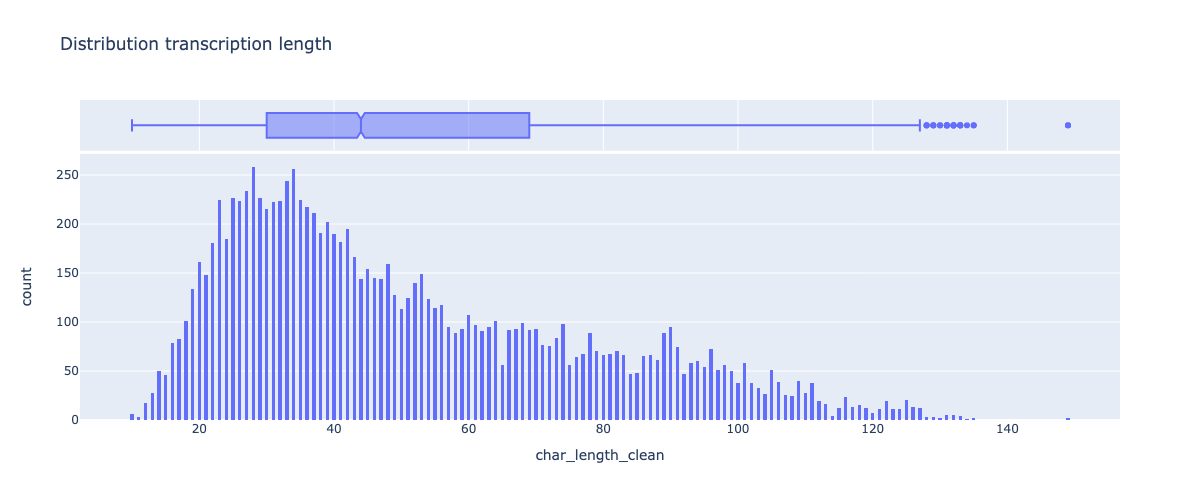

In [11]:
fig = px.histogram(data, x="char_length_clean", marginal="box", nbins=500,
                   title='Distribution transcription length',)
Image(pio.to_image(fig, format='png', width=1200))

In [12]:
initial_size = data.shape[0]
data = data[data['char_length_clean'] > 10]
print(f'percentage of data lost after removing less than 10 character transcriptions: '
      f'{(((initial_size-data.shape[0])/initial_size) * 100):.4f}%')

percentage of data lost after removing less than 10 character transcriptions: 0.0534%


In [13]:
initial_size = data.shape[0]
data = data[data['char_length_clean'] < 125]
print(f'percentage of data lost after removing more than 130 character transcriptions: '
      f'{(((initial_size-data.shape[0])/initial_size) * 100):.4f}%')

percentage of data lost after removing more than 130 character transcriptions: 0.6413%


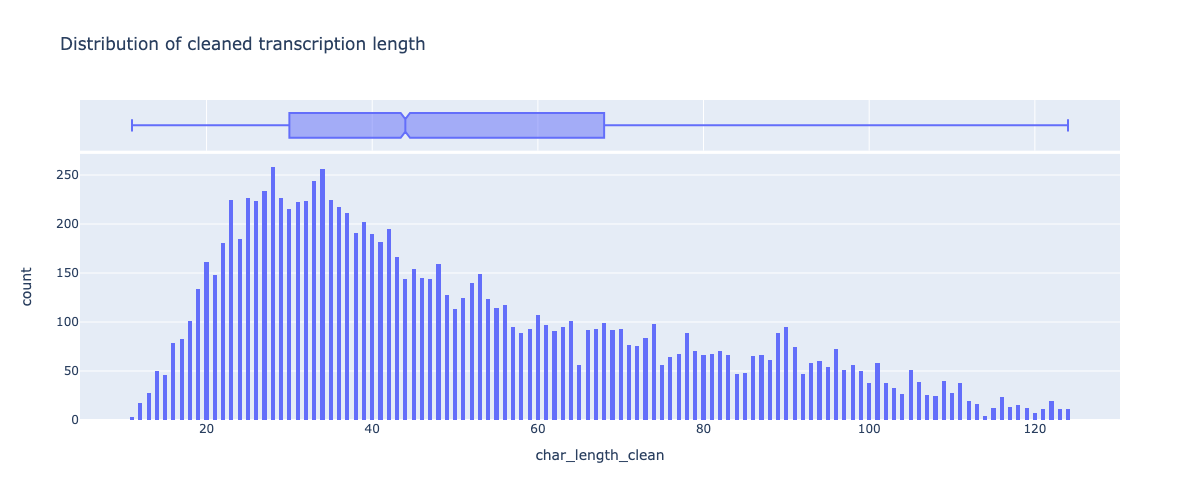

In [14]:
fig = px.histogram(data, x="char_length_clean", marginal="box", nbins=500,
                   title='Distribution of cleaned transcription length')
Image(pio.to_image(fig, format='png', width=1200))


### Duration

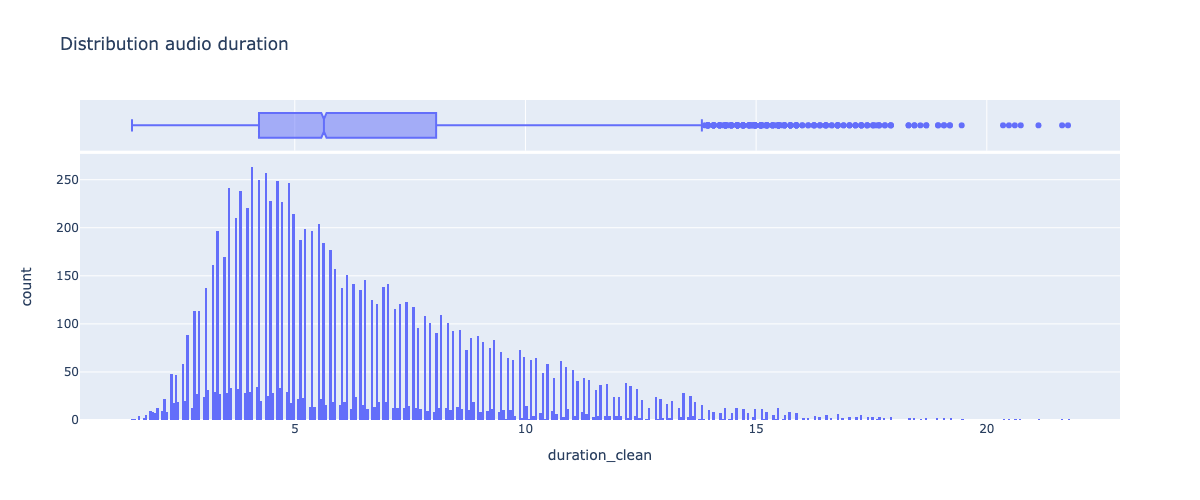

In [15]:
fig = px.histogram(data, x="duration_clean", marginal="box", nbins=500,
                   title='Distribution audio duration')
Image(pio.to_image(fig, format='png', width=1200))

In [16]:
initial_size = data.shape[0]
data = data[data['duration_clean'] > 2]
print(f'percentage of data lost after removing audio files with less than 2 second duration: '
      f'{(((initial_size-data.shape[0])/initial_size) * 100):.4f}%')

percentage of data lost after removing audio files with less than 2 second duration: 0.3317%


In [17]:
initial_size = data.shape[0]
data = data[data['duration_clean'] < 14]
print(f'percentage of data lost after removing audio files with more than 18 seconds duration: '
      f'{(((initial_size-data.shape[0])/initial_size) * 100):.4f}%')


percentage of data lost after removing audio files with more than 18 seconds duration: 1.9066%


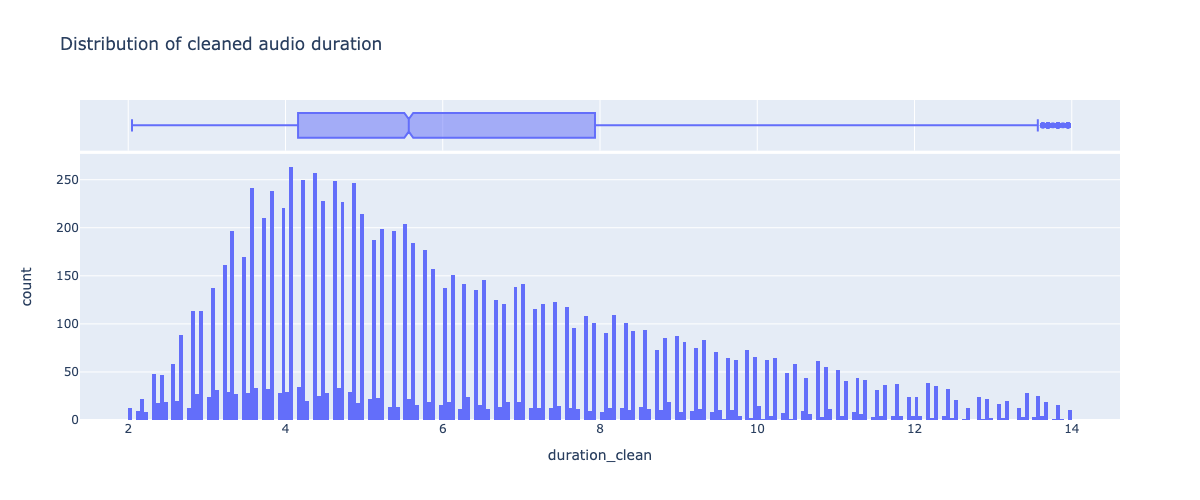

In [18]:
fig = px.histogram(data, x="duration_clean", marginal="box", nbins=500, title='Distribution of cleaned audio duration')
Image(pio.to_image(fig, format='png', width=1200))


### Speed

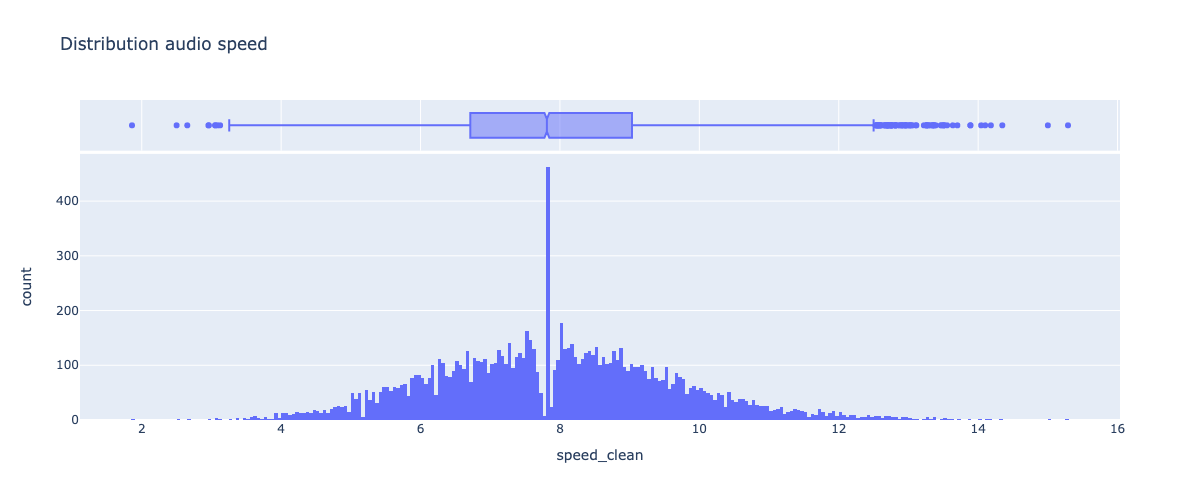

In [19]:
fig = px.histogram(data, x="speed_clean", marginal="box", nbins=500,
                   title='Distribution audio speed')
Image(pio.to_image(fig, format='png', width=1200))

In [20]:
initial_size = data.shape[0]
data = data[data['speed_clean'] > 4]
print(f'percentage of data lost after removing audio files with less than 4 char per second: '
      f'{(((initial_size-data.shape[0])/initial_size) * 100):.4f}%')

percentage of data lost after removing audio files with less than 4 char per second: 0.5409%


In [21]:
initial_size = data.shape[0]
data = data[data['speed_clean'] < 12]
print(f'percentage of data lost after removing audio files with greater than 14 char per second: '
      f'{(((initial_size-data.shape[0])/initial_size) * 100):.4f}%')

percentage of data lost after removing audio files with greater than 14 char per second: 1.6040%


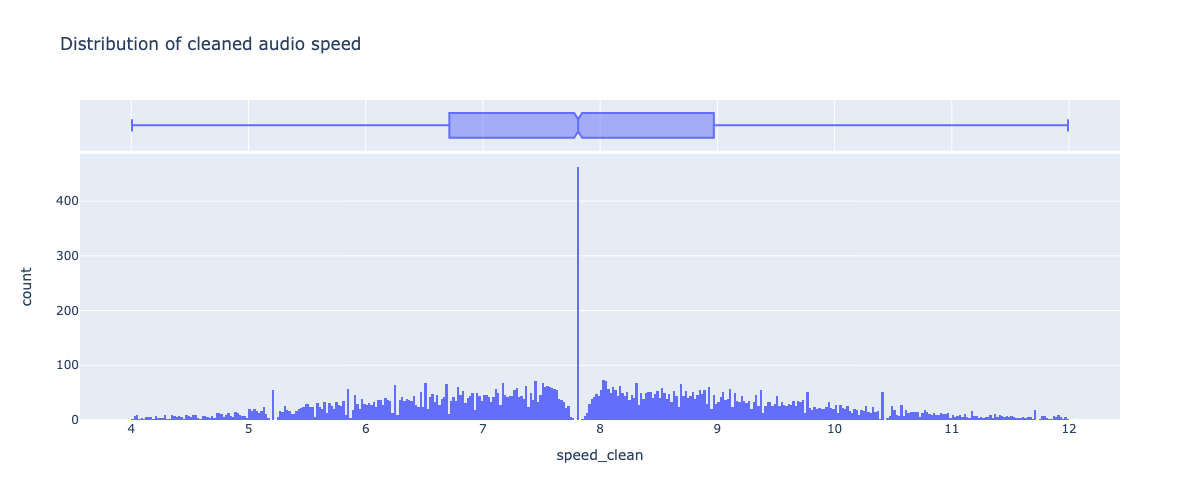

In [22]:
fig = px.histogram(data, x="speed_clean", marginal="box", nbins=500, title='Distribution of cleaned audio speed')
Image(pio.to_image(fig, format='png', width=1200))

### Final data

In [23]:
final_data = data[['key', 'clean_text', 'char_length_clean', 'duration_clean', 'speed_clean', 'category']]
final_data.rename(columns={'clean_text': 'text', 'char_length_clean': 'char_length', 
                           'duration_clean':'duration', 'speed_clean': 'speed'}, inplace=True, errors='raise')
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10674 entries, 0 to 11233
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   key          10674 non-null  object 
 1   text         10674 non-null  object 
 2   char_length  10674 non-null  int64  
 3   duration     10674 non-null  float64
 4   speed        10674 non-null  float64
 5   category     10674 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 583.7+ KB


## Save cleaned data

In [25]:
final_data.to_csv('../data/final_data.csv')